# 演習6-4

scikit-learnで回帰木の作成方法を学びます。

### Jupyter notebook内で木を表示する準備

1. Graphvizをインストールして、インストールディレクトリのbinにPATHを通しておく
2. Anaconda promptからpydotplusパッケージをインストール

  conda install -c conda-forge pydotplus

ライブラリの読み込み

In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn import tree
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

#以下、木の表示のためのライブラリ
import pydotplus
from IPython.display import Image

bostonデータの読み込み

In [2]:
boston = load_boston()
X = boston.data
y = boston.target

回帰木の作成。深さは3にしておきます。

In [3]:
rt = tree.DecisionTreeRegressor(max_depth = 3)
rt.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

木の表示

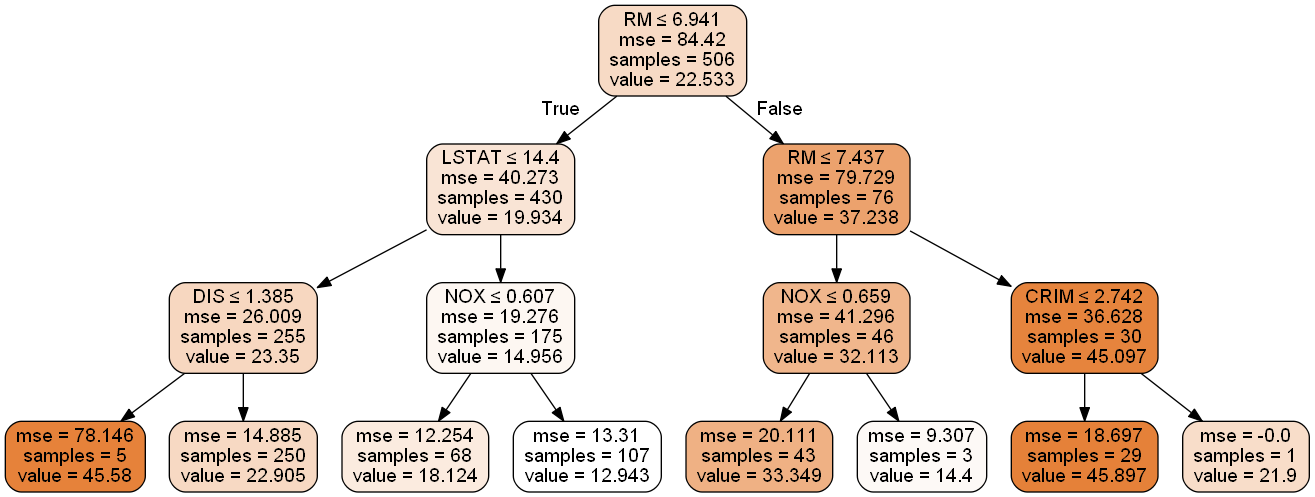

In [4]:
dot_data = tree.export_graphviz(rt, out_file=None, 
                         feature_names=boston.feature_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

### 評価

交差確認による決定係数を用いた評価

In [5]:
cv = ShuffleSplit(n_splits=10)
scores = cross_val_score(rt, X, y, cv=cv, scoring='r2')
print("{0:4.2f} +/- {1:4.2f} ".format(scores.mean(), scores.std()))

0.67 +/- 0.13 


ひとつ抜き方による二乗誤差を用いた評価

In [6]:
cv2 = LeaveOneOut()
scores = cross_val_score(rt, X, y, cv=cv2, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-23.74


### ハイパーパラメータの変更

木を浅くしてみます。

In [7]:
rt2 = tree.DecisionTreeRegressor(max_depth = 2)
rt2.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

木の表示

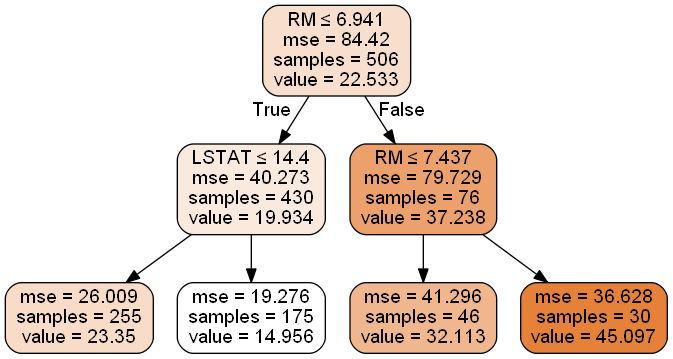

In [8]:
dot_data = tree.export_graphviz(rt2, out_file=None, 
                         feature_names=boston.feature_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

交差確認による決定係数を用いた評価

In [9]:
cv = ShuffleSplit(n_splits=10)
scores = cross_val_score(rt2, X, y, cv=cv, scoring='r2')
print("{0:4.2f} +/- {1:4.2f} ".format(scores.mean(), scores.std()))

0.63 +/- 0.12 


ひとつ抜き方による二乗誤差を用いた評価

In [10]:
cv2 = LeaveOneOut()
scores = cross_val_score(rt2, X, y, cv=cv2, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-28.78


木を深くしてみます。

In [11]:
rt3 = tree.DecisionTreeRegressor(max_depth = 6)
rt3.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

木の表示

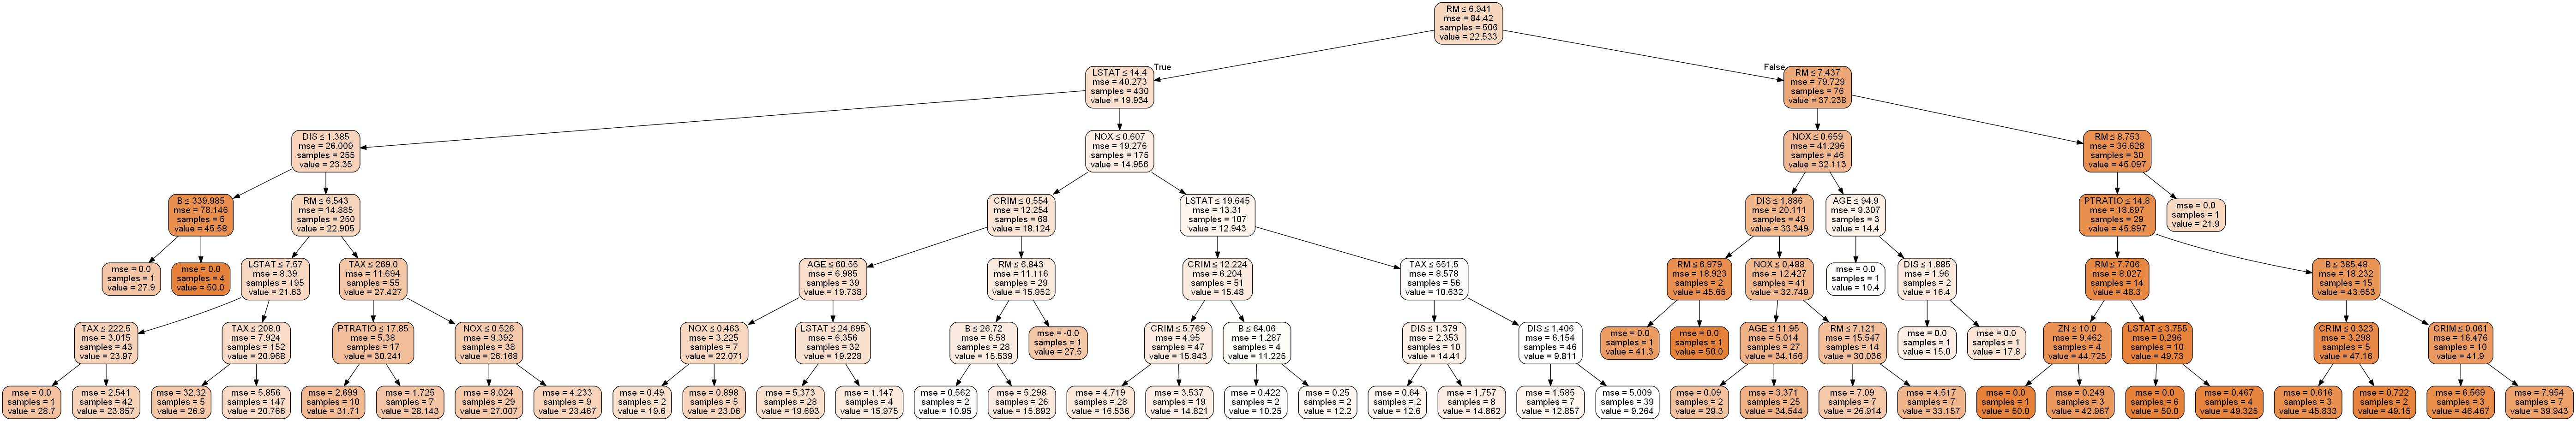

In [12]:
dot_data = tree.export_graphviz(rt3, out_file=None, 
                         feature_names=boston.feature_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

交差確認による決定係数を用いた評価

In [13]:
cv = ShuffleSplit(n_splits=10)
scores = cross_val_score(rt3, X, y, cv=cv, scoring='r2')
print("{0:4.2f} +/- {1:4.2f} ".format(scores.mean(), scores.std()))

0.82 +/- 0.06 


ひとつ抜き方による二乗誤差を用いた評価

In [14]:
cv2 = LeaveOneOut()
scores = cross_val_score(rt3, X, y, cv=cv2, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-16.65
